### Introduction to Tensorflow

In my experience, learning to anything useful in computer science has fallen at the strange intersection of theory and practice.  It's pretty easy to ignore the amount of depth that the lies under some of the things we code.  Machine learning takes that to an extreme. And everyone wants to be a Machine Learning Engineer these days.

<img src="tensorflowmeme.png">

Elements of Statistical Learning is a fantastic book. If you can get through it you'll know quite a bit, but it doesn't mean much if you're unable to put any of into practice.  Tensorflow is a framework for building, training, and deploying machine learning models.  Keras is a wrapper built on top of Tensorflow making it a bit more accessible, easier, and cleaner to work with.

The block of code below is the equivalent of "Hello World" in Tensorflow.  Despite being the first step into using Tensorflow, there is a ton to unpack here. So let's get to it.

```python
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
```

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

The MNIST dataset is composed of handwritten digits. 60,000 training images and 10,000 testing images. A **training set** is a set in which we are given the outcome of the feature we're observing.  A **feature** is a characteristic of an object that can be measured.  A more familiar term for a feature might be variable or attribute.

By using the features of objects in the training set, our model will *learn* and then make predictions on similar objects that are new it.

The **testing set** is what we will (you guessed it) test the model created through use of the training set.

In the lines above, we are telling Tensorflow that we want files from the MNIST data set and we then load data into training and testing variables

In [2]:
print(x_train.shape)

(60000, 28, 28)


We already knew that our training set had 60,000 images. The 28,28 refers to the dimensions of each image, 28 pixels by 28 pixels. So let's explore the data some more.

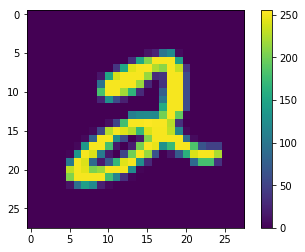

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

For any given pixel of the image, the value assigned to that pixel can fall between 0 and 255. Which brings us to our next line of code:

```python
x_train, x_test = x_train / 255.0, x_test / 255.0
```

Which standardizes all of the values in our training and testing sets.

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Okay, time for the cool stuff. 

Our first line assigns the model that we're using.
```python
tf.keras.models.Sequential
```
A sequential model can be thought of like a stack of pancakes.  Each layer is a pancake.  Since we're working our way to being fancy chefs, cooking up machine learning models, our pancakes have fillings.  The fillings try to be as good, if not better than their ingredients.  Our ingredients here are our training set.  
The layers that follow the first can automatically recognize that the input shape of the model is sequential, which is why this done only once.

```python
tf.keras.layers.Flatten(input_shape=(28, 28)),
```
We're now taking the image being fed in and "flattening" it into a 2D array.  The input shape is the dimension of the image being fed into the layer.  Think of this as reformating the image for the model.

```python
tf.keras.layers.Dense(512, activation=tf.nn.relu)
```
This creates a densely connected neural layer.  
Each input node in the layer is connected to an output node.  It received input from the previous layer, which is why it is *dense*.  The 512 represents the dimesionality of the output space, which at first glance means very little to most. An answer for what that means is a much deeper dive into neural networks than this notebook.  
An activation function takes the input of a node in the network and generates the output that will be passed to the next layer.  Without a nonlinear activation function, this would just be a linear regression model.  The type of activation function used here is the RELU or Rectified Linear Unit, which is one of the most common activation functions used.

```python
tf.keras.layers.Dropout(0.2),
```
The dropout layer is a regularization technique where randomly selected neurons are ignored in training.  Here we have a 20% rate set, which will drop one of every five inputs for the next training cycle.

```python
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
```
Similary to the RELU layer above, this layer uses a Softmax activation function.  The output of the Softmax activation function is similar to a categorial probability distribution, so it tells the probability of a class being true.

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

Now we compile the model.  
First of all, who the hell is Adam?  Not a person. Apparently it was derived from "adaptive moment estimation". A guy named Adam should have came up with this. This would be a better paragraph.  
Anyway, the optimizer does exactly what it sounds like it does.  The Adam optimization algorithm is used to update network weights based on the training data.  
The loss function is used to measure the variation between the value being predicted and what it actually is.  The goal is to minimize the loss function.

```python
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
```
Finally we fit and evaluate our model.  Something to pay attention to is that an *epoch* is not the same thing as an iteration.  An epoch is a complete pass of the training data.  Having a model run for too few epochs would leave much to be desired in terms of its performance. Having a model run for too many epochs would risk it starting to "remember" the outputs it may want and therefore compromise its accuracy.

The training of this model isn't great by any means, but this was just from the Tensorflow tutorial.

And there you have it! A first go at Tensorflow.  Although it was a few lines of code, there is still a lot left to unpack but this would just turn into a book.  If you read all of this, I hope you learned something!

In [11]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 8s 126us/step - loss: 9.9728 - acc: 0.3813

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 8s 127us/step - loss: 10.1151 - acc: 0.3724

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 8s 127us/step - loss: 10.0101 - acc: 0.3789

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 8s 126us/step - loss: 10.0149 - acc: 0.3786

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 8s 127us/step - loss: 10.0893 - acc: 0.3740

10000/10000 [==============================]10000/10000 [==============================] - 0s 32us/step



[10.388112817382812, 0.3555]